Gradient Descent (Gradienten-Abstieg):

$x = x - \eta \cdot \nabla f(x)$  
$f(x)$ ist die Funktion (z.B. Fehlerfunktion)  
$x$ ist der Parameter (z.B. Gewicht im NN)  

In [48]:
def f(x):
    return x**2

def f_prime(x):
    return 2 * x

# Globales Minimum bei x = (1, 1)
print("Minimum: ", f(0))
print("Starte bei: ", f(10))

Minimum:  0
Starte bei:  100


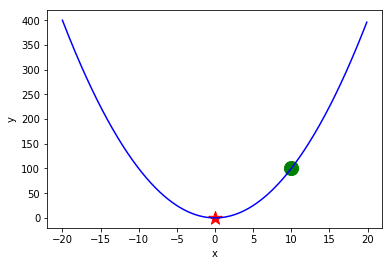

In [62]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-20, 20, 0.1)
y = [f(val) for val in x]

plt.scatter(0, f(0), color="red", marker="*", s=200)
plt.scatter(10, f(10), color="green", marker="o", s=200)
plt.plot(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [97]:
eta = 1e-3

x = 10
y = f(x)

stop_conv = 1e-6
stop_div = 1e+6
stop_iter = 1e4
it = 0

downhill_points = []

while y > stop_conv and y < stop_div and it < stop_iter:
    x = x - eta * f_prime(x)
    
    it += 1
    y = f(x)
    if it % 100 == 0:
        downhill_points.append(x)
        
print("Solution: ", y)
print("X = ", x)

Solution:  9.982536949867972e-07
X =  0.0009991264659625413


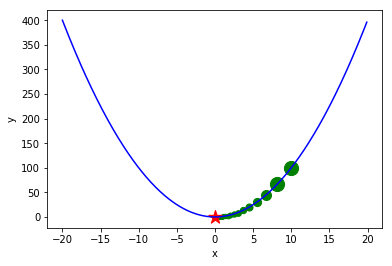

In [98]:
x = np.arange(-20, 20, 0.1)
y = [f(val) for val in x]

for index, point in enumerate(downhill_points):
    plt.scatter(point, f(point), color="green", marker="o", s=200 / (index+1))
plt.scatter(0, f(0), color="red", marker="*", s=200)
plt.scatter(10, f(10), color="green", marker="o", s=200)
plt.plot(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [99]:
xs = []
ys = []
etas = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

for eta in etas:
    x = 10
    y = f(x)

    stop_conv = 1e-6
    stop_div = 1e+6
    stop_iter = 1e4
    it = 0

    while y > stop_conv and y < stop_div and it < stop_iter:
        x = x - eta * f_prime(x)
        it += 1
        y = f(x)
    
    xs.append(x)
    ys.append(y)

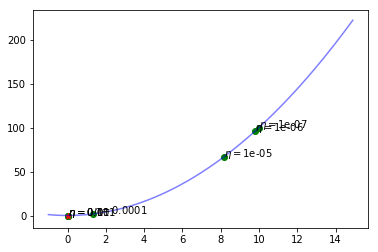

In [100]:
for index, (x, y) in enumerate(zip(xs, ys)):
    plt.scatter(x, y, color="green", marker="o")
    plt.annotate("$\eta=$"+str(etas[index]), xy=(x, y))
    
x = np.arange(-1, 15, 0.1)
y = [f(val) for val in x]
plt.plot(x, y, color="blue", alpha=0.5)
plt.scatter(0, 0, color="red", marker="*")
plt.show()

#### Teste andere Funktion

In [102]:
def f(x):
    return x**4 - 3 * x**3 + 2

def f_prime(x):
    return 4 * x**3 - 9 * x**2

Minimum:  -6.54296875
Starte bei:  6


In [106]:
minimum = 9/4
start = -1

# Globales Minimum bei x = (1, 1)
print("Minimum: ", f(minimum))
print("Starte bei: ", f(start))

Minimum:  -6.54296875
Starte bei:  6


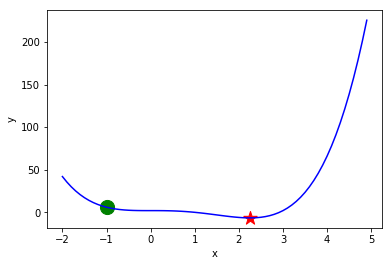

In [107]:
x = np.arange(-2, 5, 0.1)
y = [f(val) for val in x]

plt.scatter(minimum, f(minimum), color="red", marker="*", s=200)
plt.scatter(start, f(start), color="green", marker="o", s=200)
plt.plot(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [163]:
def lr(eta, it, it_max, decay=True):
    if decay:
        return eta * ((it_max - it) / it_max)
    else:
        return eta

Satring x =  -4
Solution:  2.000000000032831
X =  -0.00022201286582050904
Found  1000  better points.


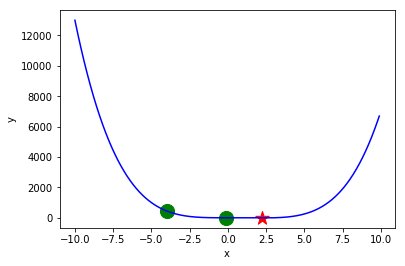

In [201]:
import random
from collections import Counter

eta = 1e-3

start = random.randint(-10, 10)
x = start
y = f(x)
print("Satring x = ", x)

stop_conv = 1e-6
stop_div = 1e+6
stop_iter = 1e6
it = 0

downhill_points = []

while y > stop_conv and y < stop_div and it < stop_iter:
    x = x - lr(eta, it, stop_iter, True) * f_prime(x)
    
    it += 1
    y = f(x)
    if it % 1000 == 0:
        downhill_points.append(x)
        
print("Solution: ", y)
print("X = ", x)
print("Found ", len(Counter(downhill_points)), " better points.")

x = np.arange(-10, 10, 0.1)
y = [f(val) for val in x]

for index, point in enumerate(downhill_points):
    plt.scatter(point, f(point), color="green", marker="o", s=200 / (index+1))
plt.scatter(minimum, f(minimum), color="red", marker="*", s=200)
plt.scatter(start, f(start), color="green", marker="o", s=200)
plt.plot(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()